## CSCI 316 Group Assignment 1
### Team 5 ( T03 )
Bryan Choo (7060452) & Lim Zhi Yang ( ) 

Task List 
- Use stratified sampling model
- At least 3 different regression models
- Discover and Visualize the data 
- Prepare the data for the machine learning algorithm 
- select and train models
- fine tune models
- evaulate the outcomes `In the end the model manages to acheive x % accuracy`

Things to take note of 
- regression problem 
- we need to predict the critical temperature in the superconductivity data

In [41]:
#  Import Relevant Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
# Import the datsets 
train = pd.read_csv('datasets/train.csv')
unique_df = pd.read_csv('datasets/unique_m.csv')

In [19]:
train

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.00
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.00
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.00
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.00
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,4,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,...,3.555556,3.223710,3.519911,1.377820,0.913658,1,2.168889,0.433013,0.496904,2.44
21259,5,92.266740,49.021367,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,...,2.047619,2.168944,2.038991,1.594167,1.337246,1,0.904762,0.400000,0.212959,122.10
21260,2,99.663190,95.609104,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,...,4.800000,4.472136,4.781762,0.686962,0.450561,1,3.200000,0.500000,0.400000,1.98
21261,2,99.663190,97.095602,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,...,4.690000,4.472136,4.665819,0.686962,0.577601,1,2.210000,0.500000,0.462493,1.84


In [23]:
train.describe()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
count,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,...,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000
mean,4.115224,87.557631,72.988310,71.290627,58.539916,1.165608,1.063884,115.601251,33.225218,44.391893,...,3.153127,3.056536,3.055885,1.295682,1.052841,2.041010,1.483007,0.839342,0.673987,34.421219
std,1.439295,29.676497,33.490406,31.030272,36.651067,0.364930,0.401423,54.626887,26.967752,20.035430,...,1.191249,1.046257,1.174815,0.393155,0.380291,1.242345,0.978176,0.484676,0.455580,34.254362
min,1.000000,6.941000,6.423452,5.320573,1.960849,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000210
25%,3.000000,72.458076,52.143839,58.041225,35.248990,0.966676,0.775363,78.512902,16.824174,32.890369,...,2.116732,2.279705,2.091251,1.060857,0.775678,1.000000,0.921454,0.451754,0.306892,5.365000
50%,4.000000,84.922750,60.696571,66.361592,39.918385,1.199541,1.146783,122.906070,26.636008,45.123500,...,2.618182,2.615321,2.434057,1.368922,1.166532,2.000000,1.063077,0.800000,0.500000,20.000000
75%,5.000000,100.404410,86.103540,78.116681,73.113234,1.444537,1.359418,154.119320,38.356908,59.322812,...,4.026201,3.727919,3.914868,1.589027,1.330801,3.000000,1.918400,1.200000,1.020436,63.000000
max,9.000000,208.980400,208.980400,208.980400,208.980400,1.983797,1.958203,207.972460,205.589910,101.019700,...,7.000000,7.000000,7.000000,2.141963,1.949739,6.000000,6.992200,3.000000,3.000000,185.000000


In [15]:
unique_df

,H,He,Li,Be,B,C,N,O,F,Ne,...,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp,material
0,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,29.00,Ba0.2La1.8Cu1O4
1,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,26.00,Ba0.1La1.9Ag0.1Cu0.9O4
2,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,19.00,Ba0.1La1.9Cu1O4
3,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,22.00,Ba0.15La1.85Cu1O4
4,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,23.00,Ba0.3La1.7Cu1O4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,2.44,Tm0.84Lu0.16Fe3Si5
21259,0.0,0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0,...,0.0,0.0,1.0,0.0,0.0,0,0,0,122.10,Tl1Ba2Ca3Cu4O11
21260,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,1.98,Nb0.8Pd0.2
21261,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,1.84,Nb0.69Pd0.31


In [26]:
# Visualize the data 


In [35]:
# Test code only 
# Split data into x ,y

X = train.drop(columns=['critical_temp'])
Y = train['critical_temp']

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)
print(f'X Train Shape {x_train.shape}\nY Train Shape: {y_train.shape}\n')
print(f'X Test Shape {x_test.shape}\nY Test Shape: {y_test.shape}')

X Train Shape (17010, 81)
Y Train Shape: (17010,)

X Test Shape (4253, 81)
Y Test Shape: (4253,)


In [37]:
model = linear_model.LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [39]:
y_pred = model.predict(x_test)

In [45]:
# Model Performance
print(f"Coefficient : {model.coef_}")
print(f"Intercept : {model.intercept_}")
print(f'Mean Squared error : {mean_squared_error(y_test, y_pred):.5f}')
print(f'Coefficient of determination  : {r2_score(y_test, y_pred):.5f}')

Coefficient : [-3.62857021e+00  7.84681734e-01 -8.64681192e-01 -4.52555974e-01
  6.02538284e-01 -3.57613172e+01  6.74684539e+00  2.18832428e-01
  3.38562804e-02 -5.66973740e-01  9.72441137e-02  1.12272350e-01
 -1.27824929e-01 -1.04016946e-01  1.48343075e-01 -1.15958817e+02
  4.44892164e+01  6.64041867e-02  2.04525477e-02 -1.88733874e-01
 -2.89271469e-02 -3.81482751e-01  3.05563066e+00  5.94732768e-02
 -2.67477138e+00  7.96925412e+01  4.20863957e+01  2.07063926e-01
 -8.30121549e-02 -3.98762963e-01 -3.06728354e-01 -4.33890147e-03
 -4.66289904e-04  6.62467548e-04  2.83001218e-03  1.29731520e+01
 -1.86531124e+01 -1.46819778e-03 -1.07666800e-04  5.52961611e-03
 -1.37694672e-03 -1.36828894e-01  5.20263668e-01  2.02108602e-01
 -5.75877095e-01  5.36050925e+00 -2.17810692e+01 -3.64012602e-01
 -1.45770642e-01  1.26610199e+00 -5.48936553e-01  1.64587115e+00
 -1.88248442e+00 -1.52293728e+00  1.60468669e+00 -1.90655651e+01
  2.63496618e+01 -3.52328520e-01  5.69911993e-01 -5.86812978e-01
  8.0104646

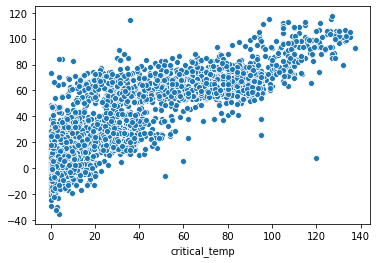

In [48]:
# Display results on graph

sns.scatterplot(y_test, y_pred)